In [85]:
from ccdproc import ImageFileCollection
import matplotlib.pyplot as plt
import numpy as np

In [86]:
data_directory = r'C:\Users\Adam Kline\Documents\Astronomy Research\Linearity of Camera\2018-05-21'

In [87]:
im_collection = ImageFileCollection(data_directory)

In [88]:
im_collection.summary

file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,swcreate,swserial,sitelat,sitelong,jd,jd-helio,object,telescop,instrume,observer,notes,flipstat,swowner
str23,bool,int32,int32,int32,int32,float64,float64,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str21,str1,str5,float64,float64,float64,str34,str32,str8,str9,float64,float64,str11,str1,str9,str1,str1,str1,str10
calibration-0001r5.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:44:51,5.0,5.0,-20.0,-20.789455500000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4061458334,2458260.4032993335,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r55.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:06:01,55.0,55.0,-20.0,-19.99107,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4208449074,2458260.418289032,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r60.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:07:16,60.0,60.0,-20.0,-20.016216,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.421712963,2458260.419186099,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r65.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:08:36,65.0,65.0,-20.0,-20.01935925,9.0,9.0,1,1,0,0,Monochrome (Preflash),r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.422638889,2458260.4201410413,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r70.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:10:21,70.0,70.0,-20.0,-20.016216,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4238541666,2458260.42138536,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r75.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:12:33,75.0,75.0,-20.0,-19.972210500000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4253819445,2458260.4229422053,calibration,,AspenCG16,,,,Matt Craig
calibration-0002r10.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:46:24,10.0,10.0,-20.0,-20.3745465,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.407222222,2458260.404404751,calibration,,AspenCG16,,,,Matt Craig
calibration-0002r15.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:46:54,15.0,15.0,-20.0,-20.30853825,9.0,9.0,1,1,0,0,Monochrome (Preflash),r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4075694443,2458260.4047809406,calibration,,AspenCG16,,,,Matt Craig
calibration-0002r20.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:47:49,20.0,20.0,-20.0,-19.890486000000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4082060186,2458260.405446506,calibration,,AspenCG16,,,,Matt Craig


In [89]:
for a_Light in im_collection.hdus(imagetyp='LIGHT'):
    print(a_Light.header['EXPOSURE'])

5.0
55.0
60.0
65.0
70.0
75.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
5.0
50.0


In [90]:
for a_flat, fname in im_collection.hdus(imagetyp='LIGHT', return_fname=True):
    print(f'In file {fname} the exposure is:', a_flat.header['EXPOSURE'], 'with standard deviation ', a_flat.data.std())

In file calibration-0001r5.fit the exposure is: 5.0 with standard deviation  326.2851504248945
In file calibration-0001r55.fit the exposure is: 55.0 with standard deviation  3498.2224764667476
In file calibration-0001r60.fit the exposure is: 60.0 with standard deviation  3837.2899757880846
In file calibration-0001r65.fit the exposure is: 65.0 with standard deviation  4128.301062144946
In file calibration-0001r70.fit the exposure is: 70.0 with standard deviation  4183.819651525861
In file calibration-0001r75.fit the exposure is: 75.0 with standard deviation  3444.3517301372854
In file calibration-0002r10.fit the exposure is: 10.0 with standard deviation  656.1859261530946
In file calibration-0002r15.fit the exposure is: 15.0 with standard deviation  989.748399244404
In file calibration-0002r20.fit the exposure is: 20.0 with standard deviation  1333.3340539673814
In file calibration-0002r25.fit the exposure is: 25.0 with standard deviation  1669.16958826983
In file calibration-0002r30.fi

In [91]:
exposures = []
means = []

for a_light in im_collection.hdus(imagetyp='LIGHT'):
    exposure = a_light.header['EXPOSURE']
    mean = np.mean(a_light.data[1500:2501, 1500:2501])
    
    exposures.append(exposure)
    means.append(mean)
    
exposures = np.array(exposures)
means = np.array(means)



In [92]:
print('Exposure times:    ', exposures)
print()
print('ADU:    ', means)

Exposure times:     [ 5. 55. 60. 65. 70. 75. 10. 15. 20. 25. 30. 35. 40. 45.  5. 50.]

ADU:     [ 5678.68037158 52008.31467134 57189.95715473 61689.46686181
 65528.42814927 65534.72238052 10437.31387793 15247.64396343
 20230.5726152  25095.28123625 29943.87576859 34284.63219598
 38749.89014083 44165.28191289  5723.0431796  49243.11080528]


Text(0,0.5,'ADU')

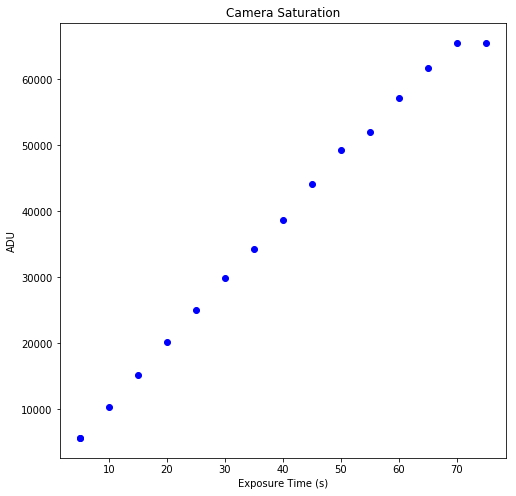

In [93]:
plt.figure(figsize=(8, 8))
plt.plot(exposures, means, 'bo')
plt.title('Camera Saturation')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')

In [94]:
good_exposure = (exposures <= 38)

In [95]:
linear_fit = np.polyfit(exposures[good_exposure], means[good_exposure], 1)
linear_fit

array([961.6717948 , 899.82912037])

In [96]:
def f(x):
    return linear_fit[0] * x + linear_fit[1]

In [97]:
y_fit = f(exposures)

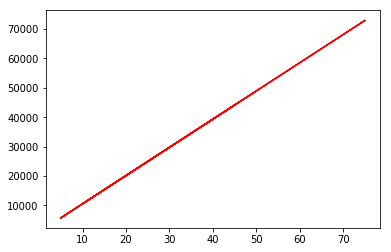

In [98]:
plt.plot(exposures, y_fit, 'r-')

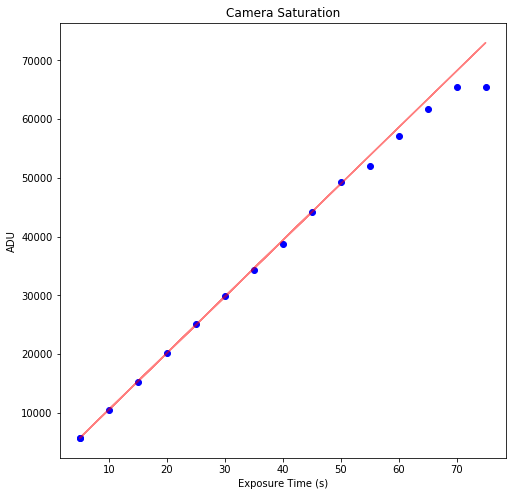

In [99]:
plt.figure(num=0, figsize=(8, 8))
plt.plot(exposures, means, 'bo', label='Mean Data')
plt.plot(exposures, y_fit, 'r-', alpha=.5, label='Best Fit')
plt.title('Camera Saturation')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')
plt.savefig('Linear Fit for Dataset 1 modified')

In [100]:
y_diff = (y_fit - means) / means * 100

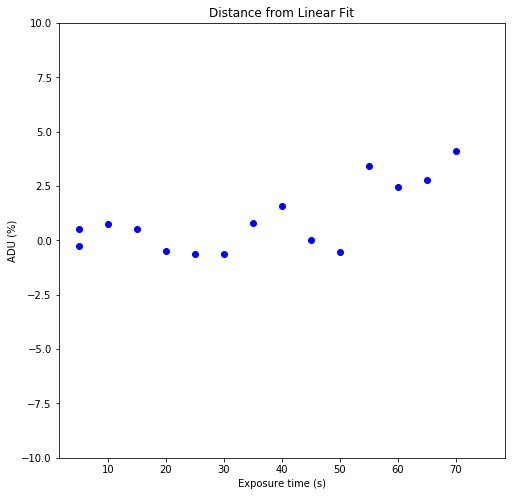

In [101]:
plt.figure(num=1, figsize=(8, 8))
plt.plot(exposures, y_diff, 'bo')
plt.title('Distance from Linear Fit')
plt.ylim(-10, 10)
plt.xlabel('Exposure time (s)')
plt.ylabel('ADU (%)')
plt.savefig('Residuals (Exposure) for Dataset 1 modified')

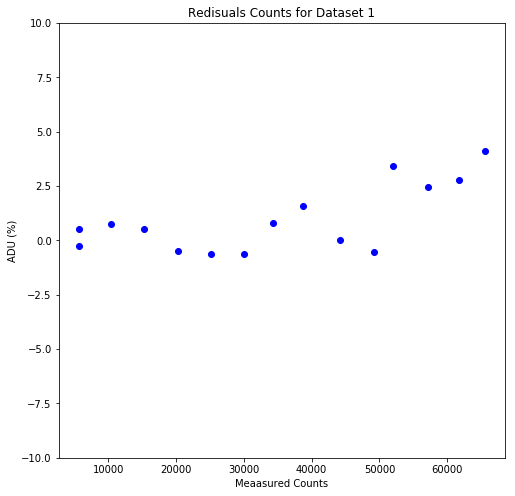

In [102]:
plt.figure(figsize=(8, 8))
plt.plot(means, y_diff, 'bo')
plt.ylim(-10, 10)
plt.title('Redisuals Counts for Dataset 1')
plt.xlabel('Meaasured Counts')
plt.ylabel('ADU (%)')
plt.savefig('Residuals Counts for Dataset 1 modified')

In [103]:
#plt.figure?

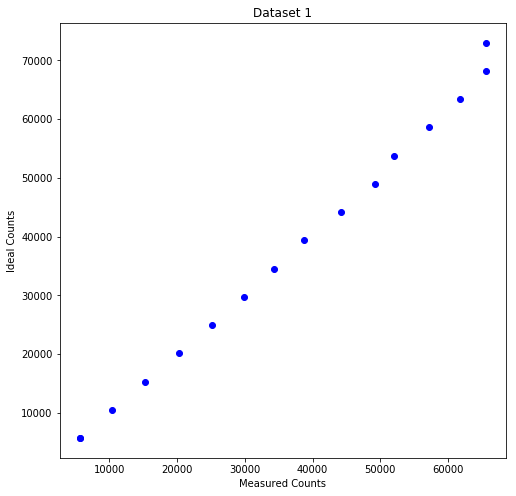

In [104]:
plt.figure(num=2, figsize=(8, 8))
plt.plot(means, y_fit, 'bo')
plt.title('Dataset 1')
plt.xlabel('Measured Counts')
plt.ylabel('Ideal Counts')
plt.savefig('Ideal Counts vs Measured Counts Dataset 1')

In [105]:
a_light.data.shape

(4096, 4109)

In [106]:
# Dataset 2
data_directory_2 = r'C:\Users\Adam Kline\Documents\Astronomy Research\Linearity of Camera\2018-05-24'
im_collection_2 = ImageFileCollection(data_directory_2)
im_collection_2.summary

file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,swcreate,swserial,sitelat,sitelong,jd,jd-helio,object,telescop,instrume,observer,notes,flipstat,cstretch,cblack,cwhite,pedestal,swowner,jd-obs,hjd-obs,bjd-obs,objctaz,azimuth,objctalt,altitude,objctha,ha,readmode,date,time-obs,ut,timesys,radecsys,airmass,st,lat-obs,long-obs,alt-obs,observat,ra,objctra,dec,objctdec,history
str33,bool,int32,int32,int32,int32,float64,float64,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str10,str1,str5,float64,float64,float64,str34,str32,str8,str9,float64,float64,str4,str39,str9,str20,str1,str1,str6,int32,int32,int32,str10,float64,float64,float64,float64,float64,float64,float64,str11,str11,str10,str8,str8,str8,str3,str3,float64,str11,float64,float64,float64,str25,str11,str11,str11,str11,str59
DOME-S001-R001-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:51:35,1.0,1.0,-20.0,-20.066508000000002,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.410821759,2458263.408210818,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,1929,1999,0,Matt Craig,2458263.4108218,2458263.4065855,2458263.4073893,268.1444,268.1444,85.2288,85.2288,00 27 44.85,00 27 44.85,Monochrome,24/05/18,21:51:35,21:51:35,UTC,FK5,1.0032457896,07 27 32.91,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T21:51:59
DOME-S001-R001-C001-r_dupe-1.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:52:08,3.0,3.0,-20.0,-20.053935000000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.411203704,2458263.4086043714,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,3760,3909,0,Matt Craig,2458263.4112037,2458263.4069674,2458263.4077712,268.2799,268.2799,85.1346,85.1346,00 28 17.94,00 28 17.94,Monochrome,24/05/18,21:52:08,21:52:08,UTC,FK5,1.00336382604,07 28 06.00,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T21:52:34
DOME-S001-R001-C001-r_dupe-10.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:58:41,21.0,21.0,-20.0,-20.000499750000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.415752315,2458263.413257555,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,20745,21593,0,Matt Craig,2458263.4157523,2458263.4115157,2458263.4123196,269.6878,269.6878,84.0121,84.0121,00 34 52.02,00 34 52.02,Monochrome,24/05/18,21:58:41,21:58:41,UTC,FK5,1.00344276875,07 34 40.08,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T21:59:25
DOME-S001-R001-C001-r_dupe-11.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:59:35,23.0,23.0,-20.0,-19.978497,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.416377315,2458263.4138941844,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,22487,23407,0,Matt Craig,2458263.4163773,2458263.4121407,2458263.4129446,269.8582,269.8582,83.8579,83.8579,00 35 46.16,00 35 46.16,Monochrome,24/05/18,21:59:35,21:59:35,UTC,FK5,1.00345089161,07 35 34.22,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T22:00:20
DOME-

In [107]:
for image in im_collection_2.hdus(imagetyp="LIGHT"):
    print(image.header['EXPOSURE'])

1.0
3.0
21.0
23.0
25.0
27.0
29.0
31.0
33.0
35.0
37.0
39.0
5.0
41.0
43.0
45.0
47.0
49.0
51.0
53.0
55.0
57.0
59.0
7.0
61.0
63.0
65.0
67.0
69.0
71.0
73.0
75.0
77.0
79.0
9.0
11.0
13.0
15.0
17.0
19.0


In [108]:
exposures_2 = []
means_2 = []

for image in im_collection_2.hdus(imagetyp='LIGHT'):
    exposures_2.append(image.header['EXPOSURE'])
    means_2.append(np.mean(image.data[:1001, :1001]))

exposures_2 = np.array(exposures_2)
means_2 = np.array(means_2)


In [109]:
print('Exposure times:    ', exposures_2)
print()
print('ADU:    ', means_2)

Exposure times:     [ 1.  3. 21. 23. 25. 27. 29. 31. 33. 35. 37. 39.  5. 41. 43. 45. 47. 49.
 51. 53. 55. 57. 59.  7. 61. 63. 65. 67. 69. 71. 73. 75. 77. 79.  9. 11.
 13. 15. 17. 19.]

ADU:     [ 1922.84900215  3754.62125986 20752.97590521 22496.68709313
 24324.00427045 26454.6727618  28360.17816749 30326.45228298
 32551.26618337 34441.279862   36637.11698092 38719.35962838
  5651.45895064 40662.56085772 42337.12025038 43769.54430285
 45928.85765882 47522.54593558 49256.63090456 51281.50897155
 52906.74614297 54641.38647367 57059.95863677  7580.7004973
 58956.8424792  60630.77062797 62259.96424554 64221.43900256
 65326.57299544 65458.33304458 65470.04608977 65470.1400787
 65470.19866547 65470.24498678  9493.64735265 11470.30491786
 13389.47539873 15165.71864499 17206.08014064 18981.90097914]


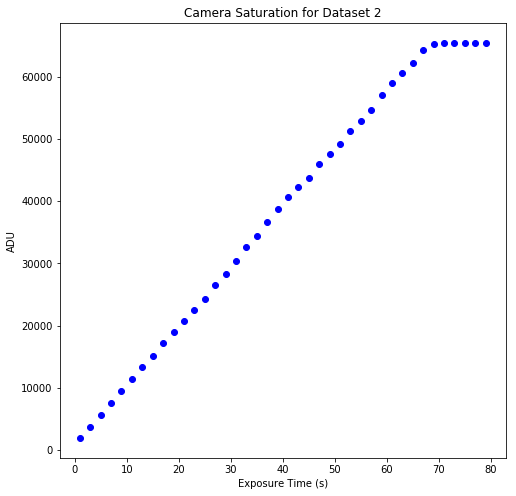

In [110]:
plt.figure(num=3, figsize=(8, 8))
plt.plot(exposures_2, means_2, 'bo')
plt.title('Camera Saturation for Dataset 2')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')
plt.savefig('Dataset 2 modified')

In [111]:
good_exposure = (exposures_2 < 38)
linear_fit = np.polyfit(exposures_2[good_exposure], means_2[good_exposure], 1)
linear_fit

array([954.36612868, 865.0114841 ])

In [112]:
def line_fit_2(x):
    return linear_fit[0] * exposures_2 + linear_fit[1]

In [113]:
y_fit_2 = line_fit_2(exposures_2)

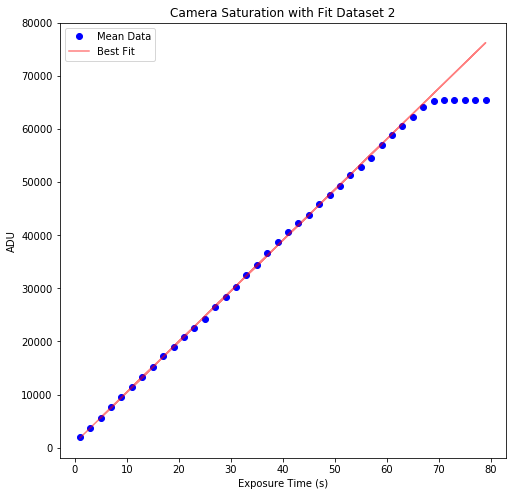

In [114]:
plt.figure(num=4, figsize=(8, 8))
plt.plot(exposures_2, means_2, 'bo', label='Mean Data')
plt.plot(exposures_2, y_fit_2, 'r-', alpha=.5, label='Best Fit')
#plt.xticks(np.arange())
plt.title('Camera Saturation with Fit Dataset 2')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')
plt.legend()
plt.savefig('Linear Fit Dataset 2 modified')

In [115]:
y_diff_2 = (y_fit_2 - means_2) / means_2 * 100

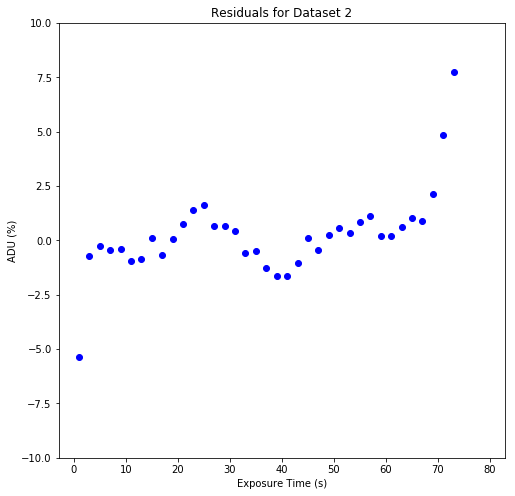

In [116]:
plt.figure(num=5, figsize=(8, 8))
plt.plot(exposures_2, y_diff_2, 'bo')
plt.ylim(-10, 10)
plt.title('Residuals for Dataset 2')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU (%)')
plt.savefig('Residuals Exposure for Dataset 2 modified')

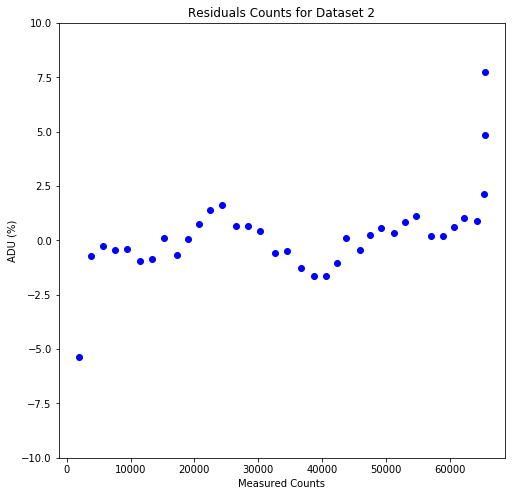

In [117]:
plt.figure(figsize=(8, 8))
plt.plot(means_2, y_diff_2, 'bo')
plt.title('Residuals Counts for Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('ADU (%)')
plt.ylim(-10, 10)
plt.savefig('Residuals Counts for Dataset 2 modified')

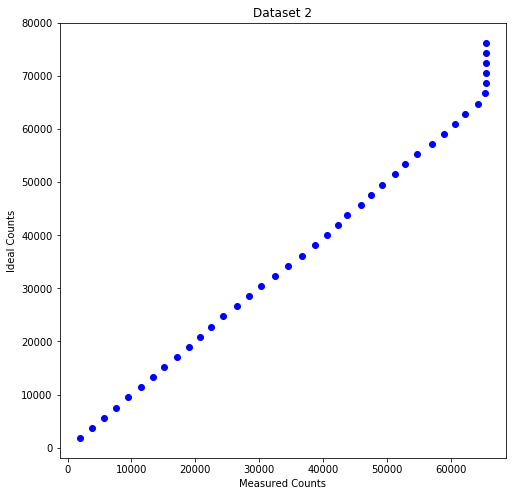

In [118]:
plt.figure(num=6, figsize=(8, 8))
plt.plot(means_2, y_fit_2, 'bo')
plt.title('Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('Ideal Counts')
plt.savefig('Ideal Counts vs Measured Counts Dataset 2')

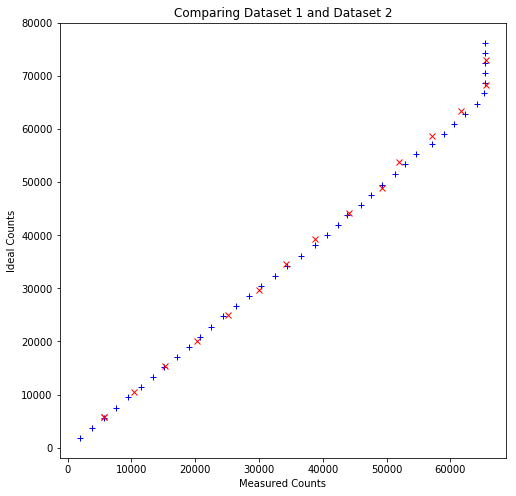

In [119]:
plt.figure(num=7, figsize=(8, 8))
plt.plot(means_2, y_fit_2, 'b+')
plt.plot(means, y_fit, 'rx')
plt.title('Comparing Dataset 1 and Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('Ideal Counts')
plt.savefig('Comparing Dataset 1 and Dataset 2', bbox_inches='tight')

# Dataset 4

In [120]:
data_directory_4 = r'C:\Users\Adam Kline\Documents\Astronomy Research\Linearity of Camera\2018-06-01'
im_collection_4 = ImageFileCollection(data_directory_4)
im_collection_4.sort('exposure')
im_collection_4.summary

file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,sbstdver,swcreate,swserial,jd,jd-helio,object,telescop,instrume,observer,notes,flipstat,cstretch,cblack,cwhite,pedestal,swowner,jd-obs,hjd-obs,bjd-obs,objctaz,azimuth,objctalt,altitude,objctha,ha,readmode,date,time-obs,ut,timesys,radecsys,airmass,st,lat-obs,long-obs,alt-obs,observat,ra,objctra,dec,objctdec,history
str34,bool,int32,int32,int32,int32,float64,float64,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str10,str1,str11,float64,float64,float64,str21,str34,str32,float64,float64,str4,str14,str14,str20,str1,str1,str6,int32,int32,int32,str10,float64,float64,float64,float64,float64,float64,float64,str12,str12,str10,str8,str8,str8,str3,str3,float64,str11,float64,float64,float64,str5,str11,str11,str11,str11,str59
dome-S003-R001-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-01T19:36:52,1.0,1.0,-20.0,-20.000499750000003,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.3172685187,2458271.315368362,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4015,4435,0,Matt Craig,2458271.3172685,2458271.3150628,2458271.3158668,4.5921,4.5921,89.9043,89.9043,-11 41 37.90,-11 41 37.90,Monochrome,01/06/18,19:36:52,19:36:52,UTC,FK5,1.0,12 17 49.01,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-01T19:37:16
dome-S003-R004-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-02T04:08:56,1.0,1.0,-20.0,-19.98164025,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.6728703706,2458271.67100307,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4055,4478,0,Matt Craig,2458271.6728704,2458271.6706601,2458271.6714641,132.9592,132.9592,89.9043,89.9043,-03 08 09.78,-03 08 09.78,Monochrome,02/06/18,04:08:56,04:08:56,UTC,FK5,1.0,20 51 17.13,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-02T04:09:20
dome-S003-R005-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-02T06:59:37,1.0,1.0,-20.0,-20.003643,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.791400463,2458271.7895441293,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4139,4572,0,Matt Craig,2458271.7914005,2458271.7891887,2458271.7899927,175.7469,175.7469,89.9043,89.9043,-00 17 00.74,-00 17 00.74,Monochrome,02/06/18,06:59:37,06:59:37,UTC,FK5,1.0,23 42 26.17,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-02T07:00:01
dome-S003-R003-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-02T01:18:13,1.0,1.0,-20.0,-19.98164025,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.55431713,2458271.5524388677,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4227,4673,0,Matt Craig,2458271.5543171,2458271.5521083,2458271.5529124,90.1632,90.1632,89.9043,89.9043,-05 59 20.83,-05 59 20.83,Monochrome,02/06/18,01:18:13,01:18:13,UTC,FK5,1.0,18 00 06.08,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-02T01:18:36
dome-S003-R002-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-01T22:27:42,1.0,1.0,-20.0,-20.0225025,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.4359027776,2458271.4340135744,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4152,4589,0,Matt Cra

In [121]:
exposures_4 = []
means_4 = []

for image in im_collection_4.hdus(imagetyp='LIGHT FRAME'):
    exposures_4.append(image.header['EXPOSURE'])
    means_4.append(np.mean(image.data[1500:2501, 1500:2501]))

exposures_4 = np.array(exposures_4)
means_4 = np.array(means_4)

In [122]:
print('Exposure times:    ', exposures_4)
print()
print('ADU:    ', means_4)

Exposure times:     [ 1.   1.   1.   1.   1.   1.5  1.5  1.5  1.5  1.5  2.   2.   2.   2.
  2.   2.5  2.5  2.5  2.5  2.5  3.   3.   3.   3.   3.   3.5  3.5  3.5
  3.5  3.5  4.   4.   4.   4.   4.   4.5  4.5  4.5  4.5  4.5  5.   5.
  5.   5.   5.   5.5  5.5  5.5  5.5  5.5  6.   6.   6.   6.   6.   6.5
  6.5  6.5  6.5  6.5  7.   7.   7.   7.   7.   7.5  7.5  7.5  7.5  7.5
  8.   8.   8.   8.   8.   8.5  8.5  8.5  8.5  8.5  9.   9.   9.   9.
  9.   9.5  9.5  9.5  9.5  9.5 10.  10.  10.  10.  10.  10.5 10.5 10.5
 10.5 10.5 11.  11.  11.  11.  11.  11.5 11.5 11.5 11.5 11.5 12.  12.
 12.  12.  12.  12.5 12.5 12.5 12.5 12.5 13.  13.  13.  13.  13.  13.5
 13.5 13.5 13.5 13.5 14.  14.  14.  14.  14.  14.5 14.5 14.5 14.5 14.5
 15.  15.  15.  15.  15.  15.5 15.5 15.5 15.5 15.5 16.  16.  16.  16.
 16.  16.5 16.5 16.5 16.5 16.5 17.  17.  17.  17.  17.  17.5 17.5 17.5
 17.5 17.5 18.  18.  18.  18.  18.  18.5 18.5 18.5 18.5 18.5 19.  19.
 19.  19.  19.  19.5 19.5 19.5 19.5 19.5 20.  20.  20.  20.  20

(0, 40)

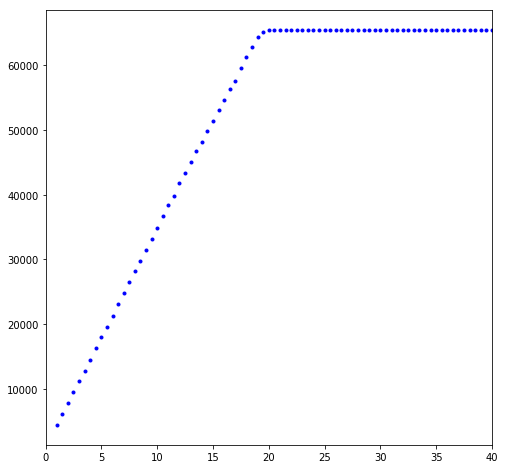

In [123]:
set_one_data = means_4[0::5]
set_two_data = means_4[1::5]
set_three_data = means_4[2::5]
set_four_data = means_4[3::5]
set_five_data = means_4[4::5]
average_data = (set_one_data + set_two_data + set_three_data + set_four_data + set_five_data) / 5

set_one_exp = exposures_4[0::5]
set_two_exp = exposures_4[1::5]
set_three_exp = exposures_4[2::5]
set_four_exp = exposures_4[3::5]
set_five_exp = exposures_4[4::5]
average_exp = (set_one_exp + set_two_exp + set_three_exp + set_four_exp + set_five_exp) / 5

average_data = np.sort(average_data)
average_exp = np.sort(average_exp)
#np.sort?
#exposures_4.shape
#print(average_data)
#print(average_exp)
plt.figure(figsize=(8, 8))
plt.plot(average_exp, average_data, 'b.')
plt.xlim(0, 40)

In [124]:
good_exposure = (average_exp < 10)
linear_fit = np.polyfit(average_exp[good_exposure], average_data[good_exposure], 1)
linear_fit

array([3395.07373555,  965.79533354])

In [125]:
def line_fit_4(x):
    return linear_fit[0] * average_exp + linear_fit[1]

In [126]:
y_fit_4 = line_fit_4(average_exp)

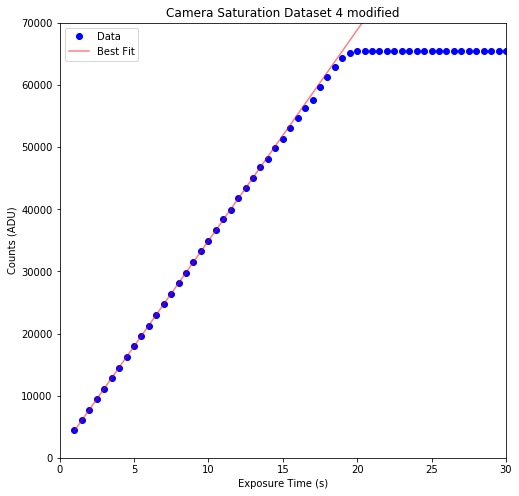

In [127]:
plt.figure(figsize=(8, 8))
plt.plot(average_exp, average_data, 'bo', label='Data')
plt.plot(average_exp, y_fit_4, 'r-', alpha=.5, label='Best Fit')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Counts (ADU)')
plt.title('Camera Saturation Dataset 4 modified')
plt.legend()
plt.ylim(0, 70000)
plt.xlim(0, 30)
plt.savefig('linear fit dataset 4 modified')

In [128]:
y_diff_4 = y_fit_4 - average_data
y_diff_4 = (y_fit_4 - average_data) / average_data * 100

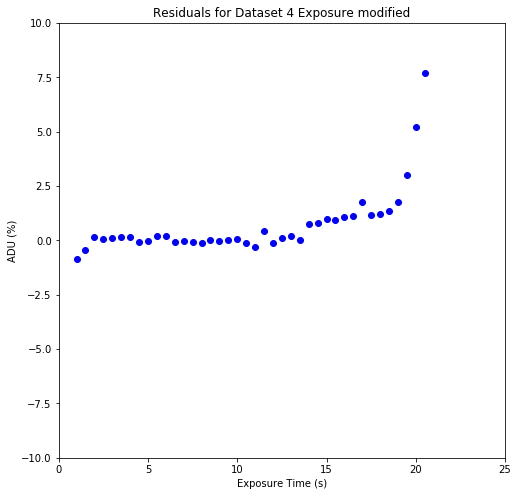

In [129]:
plt.figure(figsize=(8, 8))
plt.plot(average_exp, y_diff_4, 'bo')
plt.xlim(0, 25)
plt.ylim(-10, 10)
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU (%)')
plt.title('Residuals for Dataset 4 Exposure modified')
plt.savefig('residuals dataset 4 exp modified')

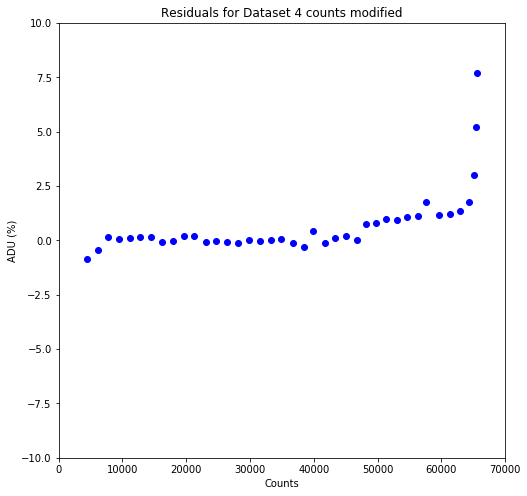

In [130]:
plt.figure(figsize=(8, 8))
plt.plot(average_data, y_diff_4, 'bo')
plt.xlim(0, 70000)
plt.ylim(-10, 10)
plt.xlabel('Counts')
plt.ylabel('ADU (%)')
plt.title('Residuals for Dataset 4 counts modified')
plt.savefig('residuals dataset 4 counts modified')

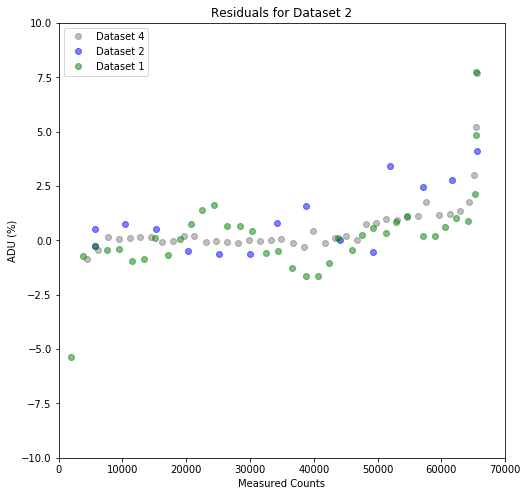

In [132]:
plt.figure(figsize=(8, 8))
plt.plot(average_data, y_diff_4, 'ko', label='Dataset 4', alpha=.25)
plt.plot(means, y_diff, 'bo', label='Dataset 2', alpha=.5)
plt.plot(means_2, y_diff_2, 'go', label='Dataset 1', alpha=.5)
#plt.plot(means_3, y_diff_3, 'ro', label='Dataset 3', alpha=.5)
plt.xlim(0, 70000)
plt.title('Residuals for Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('ADU (%)')
plt.ylim(-10, 10)
plt.legend()